In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import json

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix

C:\Users\smaiya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Data Overview

In [4]:
df = pd.DataFrame(json.load((open('data/ultimate_data_challenge.json'))))
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


There are 3 columns with incomplete data. 

In [7]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


# Data Processing

## Handling Missing Values

In [10]:
df.avg_rating_by_driver.unique()

array([5. , 4.9, 4. , 3. , 4.8, 4.7, 4.5, 4.2, nan, 4.4, 4.6, 3.7, 4.3,
       3.5, 2. , 3.8, 2.5, 4.1, 3.9, 1. , 3.3, 3.4, 3.6, 3.2, 2.3, 2.8,
       1.5, 2.7])

In [11]:
df.avg_rating_of_driver.unique()

array([4.7, 5. , 4.3, 4.6, 4.4, 3.5, nan, 4.5, 4. , 3.9, 4.9, 4.8, 2.5,
       3.7, 1. , 4.1, 4.2, 3. , 3.8, 2. , 2.7, 3.3, 2.8, 3.6, 3.4, 3.2,
       2.6, 3.1, 2.9, 1.7, 1.8, 1.5, 2.3, 1.9, 2.1, 2.4, 1.6, 2.2])

In [12]:
df.phone.describe()

count      49604
unique         2
top       iPhone
freq       34582
Name: phone, dtype: object

Imputing Missing Value
* avg_rating_by_driver and avg_rating_of_driver- Fill this with mean value rounded to 1 decimal
* phone - 34582 of the 49604 values are iPhone. Fill the missing values with iPhone

In [23]:
mean_rating_by_driver = df.avg_rating_by_driver.mean()
mean_rating_of_driver = df.avg_rating_of_driver.mean()
mode_phone = df.phone.mode()
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(mean_rating_by_driver)
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(mean_rating_of_driver)
df['phone'] = df['phone'].fillna(mode_phone[0])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


## Time Series Conversion
Converting last_trip_date and signup_date into datetime objects

In [25]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


# Fraction of Users Retained
We consider a user retained if they were active (i.e., took a trip) in the preceding 30 days. We compute this by looking at the last date time stamp in the last_trip_date column. All the users who took a trip any of the 30 days prior to this date are will be labeled as the retained users

In [26]:
df['last_trip_date'].describe()

count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

Last timestamp = 2014-07-01. Hence active users are those who took a trip from 2014-06-01 

In [31]:
df['retained'] = (df.last_trip_date>='2014-06-01')*1

In [32]:
print('Fraction Retained = {}'.format(df['retained'].sum()/len(df['retained'])))

Fraction Retained = 0.37608


# Modeling

## Feature Engineering
* Convert string columns into numeric
    * One-hot encode city and phone column
* Drop last_trip_date (used in extracting the target column, 'retained')
* Convert signup_date into an offset number starting from '2014-01-01' since that is the first date in our data set
* ultimate_black_user - {True, False} -> {1, 0}

In [35]:
df.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [36]:
df.phone.value_counts()

iPhone     34978
Android    15022
Name: phone, dtype: int64

In [37]:
# Mapping string to numbers and then one-hot encode
df['city'] = df['city'].map({'Winterfell':0, 'Astapor':1, 'King\'s Landing':2})
df['phone'] = df['phone'].map({'iPhone':0, 'Android':1})
city=pd.get_dummies(df['city'], prefix='city')
phone=pd.get_dummies(df['phone'], prefix='phone')
df=pd.concat([df, city, phone],axis=1)

In [41]:
#Drop Columns
drop_columns = ['city_2', 'city', 'phone', 'phone_1', 'last_trip_date']
df = df.drop(drop_columns, axis=1)

In [56]:
# Converting signup_date columns into an offset with respect to 2014-01-01
df['signup_date'] = df['signup_date'].dt.strftime('%Y%m%d').astype(int)-20140101

In [57]:
# ultimate_black_user - map True/False to 1/0
df['ultimate_black_user'] = df['ultimate_black_user']*1

## Test/Train Split

In [59]:
X = df.drop('retained', axis=1)
y = df['retained']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

## Random Forest Classifier

In [61]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [200, 500, 1000], 
             'max_depth': [10, 20, 25], 
             'max_features': [2, 4, 7],
             'min_samples_leaf': [1, 5, 9], 
             'min_samples_split': [2, 5, 10]}

rf_cv = RandomizedSearchCV(rf, param_grid, cv=5, scoring='f1')
rf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [200, 500, 1000], 'max_depth': [10, 20, 25], 'max_features': [2, 4, 7], 'min_samples_leaf': [1, 5, 9], 'min_samples_split': [2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=0)

In [63]:
rf_cv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 9,
 'max_features': 7,
 'max_depth': 25}

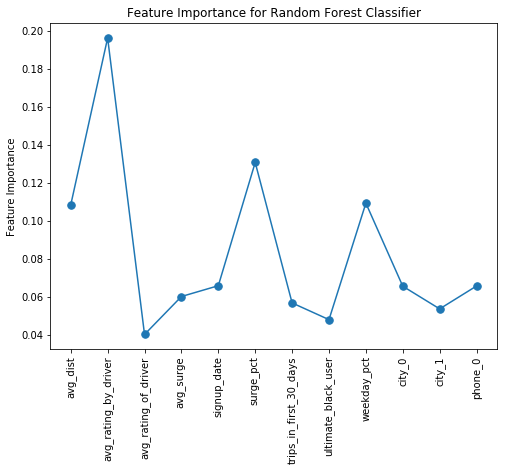

In [64]:
fig = plt.figure(figsize=(8, 6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(rf_cv.best_estimator_.feature_importances_, marker='.', markersize=15)
plt.xticks(range(len(rf_cv.best_estimator_.feature_importances_)), X_train.columns, rotation=90)
axes.set(ylabel='Feature Importance', title='Feature Importance for Random Forest Classifier')
plt.show()

In [65]:
pd.DataFrame(rf_cv.best_estimator_.feature_importances_, index = X_train.columns, columns=['Feature Importance'])

,Feature Importance
avg_dist,0.108311
avg_rating_by_driver,0.196084
avg_rating_of_driver,0.040183
avg_surge,0.060141
signup_date,0.065821
surge_pct,0.130614
trips_in_first_30_days,0.056768
ultimate_black_user,0.047987
weekday_pct,0.109233
city_0,0.065551


In [66]:
y_pred = rf_cv.predict(X_test)

In [67]:
confusion_matrix(y_test, y_pred)

array([[5412,  827],
       [1352, 2409]], dtype=int64)

In [68]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.80      0.87      0.83      6239
          1       0.74      0.64      0.69      3761

avg / total       0.78      0.78      0.78     10000



# Conclusion
* The feature importance suggests average_rating_by_driver, surge_pct as the top important features on whether the rider will be retained or not
* Given that surge is one of the most important feature, reducing the surge prices might help in retaining more users
* The model achieves a F1-score of 0.78